# SVD theory

## Example 1

$\begin{bmatrix}
1&1\\
1&1\\
0&0\end{bmatrix}=\begin{bmatrix}
\frac{1}{\sqrt{2}}&0&\frac{1}{\sqrt{2}}\\
\frac{1}{\sqrt{2}}&0&-\frac{1}{\sqrt{2}}\\
0&1&0\end{bmatrix}\begin{bmatrix}
2&0\\
0&0\\
0&0\end{bmatrix}\begin{bmatrix}
\frac{1}{\sqrt{2}}&\frac{1}{\sqrt{2}}\\
\frac{1}{\sqrt{2}}&-\frac{1}{\sqrt{2}}\end{bmatrix}^T$

## Example 2

$\begin{bmatrix}
2&3\\
0&2\end{bmatrix}=\frac{1}{\sqrt{5}}\begin{bmatrix}
2&-1\\
1&2\end{bmatrix}\begin{bmatrix}
4&\\
&1\end{bmatrix}\frac{1}{\sqrt{5}}\begin{bmatrix}
1&-2\\
2&1\end{bmatrix}^T$

## Example 3 (Quiz 4-#4)

The orthogonal diagonalization $A = Q\Lambda Q^T$ is its SVD.

$\begin{bmatrix}
1&1&0\\
1&1&0\\
0&0&0\end{bmatrix}=\begin{bmatrix}
\frac{1}{\sqrt{2}}&0&\frac{1}{\sqrt{2}}\\
\frac{1}{\sqrt{2}}&0&-\frac{1}{\sqrt{2}}\\
0&1&0\end{bmatrix}\begin{bmatrix}
2&0&0\\
0&0&0\\
0&0&0\end{bmatrix}\begin{bmatrix}
\frac{1}{\sqrt{2}}&0&\frac{1}{\sqrt{2}}\\
\frac{1}{\sqrt{2}}&0&-\frac{1}{\sqrt{2}}\\
0&1&0\end{bmatrix}^T$

## $A=\sum_{i=1}^k\sigma_ku_iv_i^T$

In [2]:
np.set_printoptions(suppress=True)
%precision 3

'%.3f'

In [4]:
B = np.random.randn(3,2); print(B)

[[ 0.948 -0.206]
 [-0.221  1.358]
 [-0.412 -1.934]]


In [5]:
Ub,Sb,Vb = np.linalg.svd(B)

In [9]:
np.allclose(B, Ub[:,:2]@np.diag(Sb)@Vb)

True

In [11]:
B1=Sb[0]*Ub[:,:1]@Vb[:1,:];print(B1)

[[-0.009 -0.142]
 [ 0.089  1.338]
 [-0.13  -1.952]]


# Some applications of SVD

image compression, data compression, dimension reduction, background removal, recommendation system,...

## SVD on image compression

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [12]:
path = "./data/"

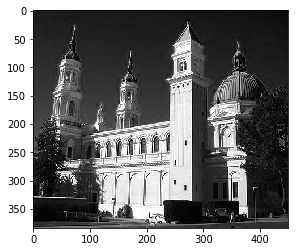

In [13]:
img = mpimg.imread(path+'church.jpg')
I = img[:,:,0]
plt.imshow(I, cmap = 'gray')

In [14]:
I = I.astype(float)

In [15]:
U,S,V = np.linalg.svd(I, full_matrices=0)

In [16]:
np.allclose(I, U@np.diag(S)@V)

True

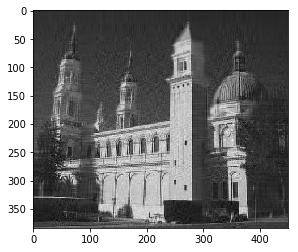

In [25]:
s = 50
plt.imshow(U[:,:s]@np.diag(S[:s])@V[:s,:], cmap = 'gray')

In [22]:
U.shape

(384, 384)

In [23]:
V.shape

(384, 450)

In [26]:
(s+s*384+s*450)/(384*450)

0.242

## Line fitting using SVD

These 4 points are from HW4

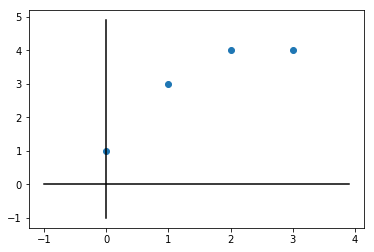

In [27]:
x = np.array([0,1,2,3])
y = np.array([1,3,4,4])
plt.scatter(x,y)
plt.plot(np.arange(-1,4,0.1),np.zeros(50),'k')
plt.plot(np.zeros(60),np.arange(-1,5,0.1),'k')
plt.show()

### Find the 1-dimensional subspace that these 4 points are closest to.

In [28]:
A = np.vstack((x,y)).T; print(A)

[[0 1]
 [1 3]
 [2 4]
 [3 4]]


### Find the 1-dim subspace that these 4 rows are approximately on.

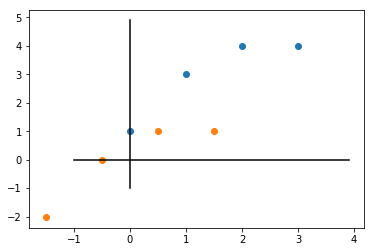

In [29]:
plt.scatter(x,y)
plt.scatter(x - np.mean(x),y - np.mean(y))
plt.plot(np.arange(-1,4,0.1),np.zeros(50),'k')
plt.plot(np.zeros(60),np.arange(-1,5,0.1),'k')
plt.show()

### We should be doing SVD on

In [30]:
print(A - np.array([np.mean(x),np.mean(y)]))

[[-1.5 -2. ]
 [-0.5  0. ]
 [ 0.5  1. ]
 [ 1.5  1. ]]


## Principal Component Analysis (PCA)

and data compression...

In [39]:
C = np.array([[10,102],[0,100],[-10,99]]); print(C)

[[ 10 102]
 [  0 100]
 [-10  99]]


In [40]:
np.set_printoptions(suppress=True)
%precision 3
Uc,Sc,Vc = np.linalg.svd(C)
print(Uc)
print(Sc)
print(Vc)

[[-0.587  0.7    0.407]
 [-0.575 -0.007 -0.818]
 [-0.57  -0.714  0.407]]
[173.796  14.141]
[[-0.001 -1.   ]
 [ 1.    -0.001]]


In [41]:
print('The rank-1 approximation of\n',C,'is\n',Sc[0]*Uc[:,:1]@Vc[:1,:])

The rank-1 approximation of
 [[ 10 102]
 [  0 100]
 [-10  99]] is
 [[  0.102 102.01 ]
 [  0.1   100.   ]
 [  0.099  98.99 ]]


### The right way to do PCA

In [42]:
print(C)

[[ 10 102]
 [  0 100]
 [-10  99]]


In [43]:
Cc = C - np.array([0,100]); print(Cc)

[[ 10   2]
 [  0   0]
 [-10  -1]]


In [44]:
UCc, SCc, VCc = np.linalg.svd(Cc)

In [45]:
print(UCc)
print(SCc)
print(VCc)

[[-0.712 -0.702  0.   ]
 [ 0.     0.    -1.   ]
 [ 0.702 -0.712  0.   ]]
[14.301  0.699]
[[-0.989 -0.149]
 [ 0.149 -0.989]]


In [46]:
print('The rank-1 approximation of\n',Cc,'is\n',SCc[0]*UCc[:,:1]@VCc[:1,:])

The rank-1 approximation of
 [[ 10   2]
 [  0   0]
 [-10  -1]] is
 [[10.073  1.515]
 [-0.    -0.   ]
 [-9.926 -1.493]]


$\begin{bmatrix}
10&101\\
0&100\\
-10&99\end{bmatrix} = \begin{bmatrix}
0&100\\
0&100\\
0&100\end{bmatrix}+\begin{bmatrix}
10&1\\
0&0\\
-10&-1\end{bmatrix}=\begin{bmatrix}
0&10\\
0&100\\
0&100\end{bmatrix}+14.213\begin{bmatrix}-0.707\\0\\0.707\end{bmatrix}[-0.995 -0.1]$

### What does this mean statistically?

## Background Removal

https://nbviewer.jupyter.org/github/fastai/numerical-linear-algebra-v2/blob/master/nbs/02-Background-Removal-with-SVD.ipynb

## I have to skip many interesting and practical topics such as

- How to solve $Ax=b$: LU decomposition with pivoting
- Three most common algorithms for solving least squares solution: 
  - normal equaiton
  - QR (HW4 #2c)
  - SVD
- How to practically find eigenvalues and eigenvectors.

All answers can be found in *Numerical Linear Algebra, by Trefethan and Bau* if you are interested.

A more hardcore book is: [Matrix Computations](https://www.amazon.com/Computations-Hopkins-Studies-Mathematical-Sciences/dp/1421407949/ref=sr_1_1?ie=UTF8&qid=1529198670&sr=8-1&keywords=matrix+computations)